In [1]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
from time import time
import pandas

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from catch_converter.parse_contours import parse_cvi42ws
from LazyLuna.Mini_LL import *
from LazyLuna.CATCH_utils import *
from LazyLuna.Tables  import *
from LazyLuna.Figures import *

import shapely

In [2]:
bp        = '/Users/dietrichhadler/Desktop/Daten/CAMAID'
bp_annos1 = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Gold'
bp_annos2 = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Reader2'
bp_cases  = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Cases'
bp_imgs   = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Imgs'

In [ ]:
"""
# unpack the workspaces from ws_path to case_storage_path
for bp_annos in [bp_annos1,bp_annos2]:
    #bp_annos = bp_annos2
    parse_cvi42ws(bp_annos, bp_annos, process=True, debug=False)
    cases = []
    paths = get_imgs_and_annotation_paths(bp_imgs, bp_annos)
    view1 = SAX_T1_View()
    view2 = SAX_T2_View()
    for imgp, annop in paths:
        #if '001_1' not in imgp: continue
        try:
            print(imgp, annop)
            st = time()
            case = Case(imgp, annop, os.path.basename(imgp), os.path.basename(bp_annos))
            view1.initialize_case(case, debug=True)
            view2.initialize_case(case, debug=True)
            case.store(bp_cases)
            cases.append(case)
            print('Case customization took: ', time()-st, 'Case: ', case.reader_name, case.case_name)
        except Exception as e:
            print('Failed at: ', imgp, annop, ' , Exception: ', e)
        print()
        #break
"""

In [3]:
cases = [pickle.load(open(os.path.join(bp_cases,p), 'rb')) for p in os.listdir(bp_cases)]
cases1 = sorted([c for c in cases if c.reader_name=='Gold'], key=lambda c:c.case_name)
cases2 = sorted([c for c in cases if c.reader_name=='Reader2'], key=lambda c:c.case_name)
print([c.case_name for c in cases1])
print([c.case_name for c in cases2])
print(len(cases1))
print(len(cases2))

v = SAX_T1_View()
#v = SAX_T2_View()
for c_i in range(len(cases1)): 
    print(cases1[c_i].case_name, cases1[c_i].other_categories.keys())
    try: cases1[c_i] = v.customize_case(cases1[c_i])
    except Exception as e: print(e)
print()
for c_i in range(len(cases2)): 
    print(cases2[c_i].case_name, cases2[c_i].other_categories.keys())
    try: cases2[c_i] = v.customize_case(cases2[c_i])
    except Exception as e: print(e)
#cases1 = [v.customize_case(c) for c in cases1]
#cases2 = [v.customize_case(c) for c in cases2]
for c1,c2 in zip(cases1,cases2):
    print(c1.case_name)
    if not hasattr(c1, 'crs') or not hasattr(c2, 'crs'): continue
    for cr1,cr2 in zip(c1.crs,c2.crs):
        print(cr1.name, cr1.get_cr(True), cr2.get_cr(True), cr1.get_cr_diff(cr2,True))
    print()

['CAMAID_001_1', 'CAMAID_002_1', 'CAMAID_003_1', 'Camaid_004_1', 'Camaid_005_1', 'Camaid_006_1', 'Camaid_007_1', 'Camaid_008_1', 'Camaid_009_1', 'Camaid_010_1', 'Camaid_011_1', 'Camaid_014_1', 'Camaid_015_1', 'Camaid_016_1', 'Camaid_017_1']
['CAMAID_001_1', 'CAMAID_002_1', 'CAMAID_003_1', 'Camaid_004_1', 'Camaid_005_1', 'Camaid_006_1', 'Camaid_007_1', 'Camaid_008_1', 'Camaid_009_1', 'Camaid_010_1', 'Camaid_011_1', 'Camaid_014_1', 'Camaid_015_1', 'Camaid_016_1', 'Camaid_017_1']
15
15
CAMAID_001_1 dict_keys(['SAX CINE', 'SAX T1', 'SAX T2'])
CAMAID_002_1 dict_keys(['SAX CINE', 'SAX T1', 'SAX T2'])
CAMAID_003_1 dict_keys(['SAX CINE', 'SAX T1', 'SAX T2'])
Camaid_004_1 dict_keys(['SAX CINE', 'SAX T1', 'SAX T2'])
Camaid_005_1 dict_keys([])
(1, 0)
Camaid_006_1 dict_keys(['SAX CINE', 'SAX T1', 'SAX T2'])
Camaid_007_1 dict_keys(['SAX CINE', 'SAX T1', 'SAX T2'])
Camaid_008_1 dict_keys(['SAX CINE', 'SAX T1', 'SAX T2'])
Camaid_009_1 dict_keys(['SAX CINE', 'SAX T1', 'SAX T2'])
Camaid_010_1 dict_keys

AttributeError: 'SAX_T1_Annotation' object has no attribute 'get_myo_mask'

In [ ]:
for case1, case2 in zip(cases1, cases2):
    print(case1.case_name, case1.case_name==case2.case_name)
    print(case1.reader_name, case2.reader_name)
    if not hasattr(case1, 'crs') or not hasattr(case2, 'crs'): continue
    cat = case1.categories[0]
    cat2 = case2.categories[0]
    for cr1,cr2 in zip(case1.crs, case2.crs):
        print(cr1.name, cr1.get_cr(string=True), cr2.get_cr(string=True), cr1.get_cr_diff(cr2, string=True))
    m1 = T1AvgDiffMetric()
    m2 = T1AvgReaderMetric()
    m3 = AngleDiffMetric()
    for d in range(cat.nr_slices):
        img1  = cat.get_img  (d, 0, True, False)
        img2  = cat.get_img  (d, 0, True, False)
        anno1 = cat.get_anno (d, 0)
        anno2 = cat2.get_anno(d, 0)
        a = cat.pixel_h*cat.pixel_w
        lvmyo1, lvmyo2 = anno1.get_contour('lv_myo'), anno2.get_contour('lv_myo')
        print(d)
        print('T1Diff val: ', m1.get_val(lvmyo1, lvmyo2, img1, img2))
        print('Reader 1:   ', m2.get_val(lvmyo1, img1))
        print('Reader 2:   ', m2.get_val(lvmyo2, img2))
        print('Angle Diff: ', m3.get_val(anno1, anno2))
        print()
        continue
        fig, ax = plt.subplots(1,1, figsize=(17,17))
        h,w = img.shape
        ax.imshow(img, cmap='gray', extent=(0,w,h,0))
        #anno.plot_all_contour_outlines(ax)
        anno.plot_contour_outlines(ax, 'lv_myo')
        anno.plot_contour_outlines(ax, 'scar_fwhm')
        anno.plot_contour_face(ax, 'scar_fwhm_excluded_area', c='g')
        anno.plot_contour_face(ax, 'excludeEnhancementAreaContour', c='r')
        #anno.plot_contour_face(ax, 'saEnhancementReferenceMyoContour', c='g')
        plt.show()
    print()

In [ ]:
for v in [SAX_T1_View(), SAX_T2_View()]:
    for case1, case2 in zip(cases1, cases2):
        print(case1.case_name)
        print(case1.reader_name, case2.reader_name)
        for case in [case1, case2]: v.customize_case(case)
        cat1, cat2 = case1.categories[0], case2.categories[0]
        for cr1, cr2 in zip(case1.crs, case2.crs):
            print(cr1.name, cr1.get_cr(string=True), cr2.get_cr(string=True), cr1.get_cr_diff(cr2, string=True))
        for d in range(cat1.nr_slices):
            print('Slice: ', d)
            img1,  img2  = cat1.get_img (d,0,True,True), cat2.get_img (d,0,True,True)
            anno1, anno2 = cat1.get_anno(d,0), cat2.get_anno(d,0)
            b  = 45
            bb = anno1.get_contour('lv_myo').envelope
            if hasattr(bb, 'exterior'):
                x, y = np.array(bb.exterior.xy)
                lx, ly, ux, uy = x.min()-b-10, y.min()-b, x.max()+b, y.max()+b
            fig, axes = plt.subplots(1,3, figsize=(22,15))
            for ax in axes:  
                ax.imshow(img1, cmap='gray'); ax.axis('off')
                if hasattr(bb, 'exterior'):
                    ax.set_xlim([lx, ux]); ax.set_ylim([ly, uy])
            anno1.plot_contour_outlines(axes[0], 'lv_myo')
            anno1.plot_cont_comparison (axes[1], anno2, 'lv_myo')
            anno2.plot_contour_outlines(axes[2], 'lv_myo')
            fig.tight_layout()
            #fig.savefig(os.path.join(bp, 'Outputs', case1.case_name+'_depth_'+str(d)+'.png'), dpi=300)
            plt.show()
        #break

In [ ]:
def plot_value_diffs_by_segment(anno1, anno2, img1, img2, nr_segments, byreader=None):
    refpoint = None
    if byreader is not None: refpoint = anno1.get_point('sacardialRefPoint') if byreader==1 else anno2.get_point('sacardialRefPoint')
    print(refpoint)
    myo_vals1 = anno1.get_myo_mask_by_angles(img1, nr_segments, refpoint)
    myo_vals2 = anno2.get_myo_mask_by_angles(img2, nr_segments, refpoint)
    # make vals to pandas table
    rows = []
    for k in myo_vals1.keys():
        for v in myo_vals1[k]:
            row = ['R1', '('+str(int(np.round(k[0])))+'°, '+str(int(np.round(k[1])))+'°)', v]
            rows.append(row)
        for v in myo_vals2[k]:
            row = ['R2', '('+str(int(np.round(k[0])))+'°, '+str(int(np.round(k[1])))+'°)', v]
            rows.append(row)
        row = ['R1-R2', '('+str(int(np.round(k[0])))+'°, '+str(int(np.round(k[1])))+'°)', np.mean(myo_vals1[k])-np.mean(myo_vals2[k])]
        rows.append(row)
    columns = ['Reader', 'Angle Bins', 'Value']
    df = pandas.DataFrame(rows, columns=columns)
    display(df[df['Reader']=='R1-R2'])
    #display(df)
    fig, axes = plt.subplots(1,3, figsize=(20,5))
    sns.barplot(x='Angle Bins', y='Value', data=df[df['Reader']=='R1'],    ax=axes[0], capsize=.2)
    sns.barplot(x='Angle Bins', y='Value', data=df[df['Reader']=='R2'],    ax=axes[1], capsize=.2)
    sns.barplot(x='Angle Bins', y='Value', data=df[df['Reader']=='R1-R2'], ax=axes[2], capsize=.2)
    ymax = df['Value'].mean() + df['Value'].std()*2
    axes[0].set_ylim([0, ymax]); axes[0].tick_params(rotation=45)
    axes[1].set_ylim([0, ymax]); axes[1].tick_params(rotation=45)
    ymin = df[df['Reader']=='R1-R2']['Value'].min()
    ymax = df[df['Reader']=='R1-R2']['Value'].max()
    ymin, ymax = min(ymin, -ymax)*1.05, max(-ymin, ymax)*1.05
    axes[2].tick_params(rotation=45)
    axes[2].set_ylim([ymin, ymax])
    plt.show()
    
v = SAX_T1_View()
case1, case2 = cases1[1], cases2[1]
case1 = v.customize_case(case1)
case2 = v.customize_case(case2)
cat1, cat2 = case1.categories[0], case2.categories[0]
nr_segments = 3
for d in range(cat1.nr_slices):
    print('Slice: ', d)
    img1,  img2  = cat1.get_img (d,0,True,False), cat2.get_img (d,0,True,False)
    anno1, anno2 = cat1.get_anno(d,0), cat2.get_anno(d,0)
    plot_value_diffs_by_segment(anno1, anno2, img1, img2, nr_segments, 2)

Slice:  0


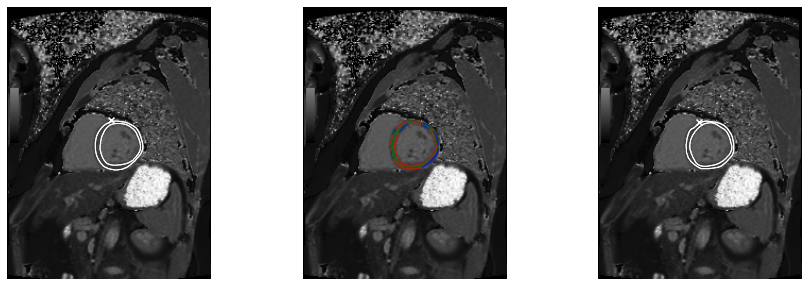

256 192
(256, 192) (256, 192)


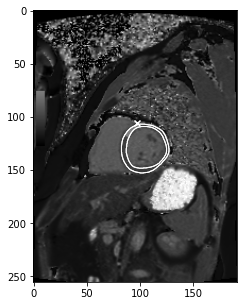

Slice:  1


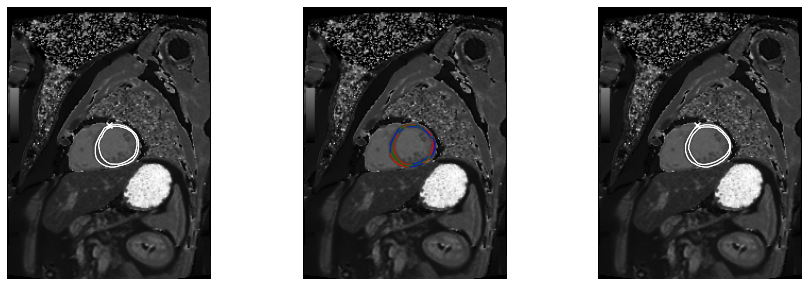

256 192
(256, 192) (256, 192)


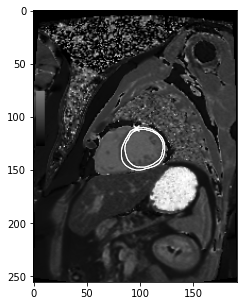

Slice:  2


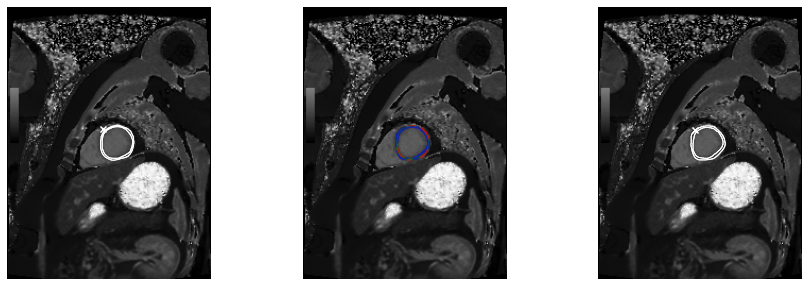

256 192
(256, 192) (256, 192)


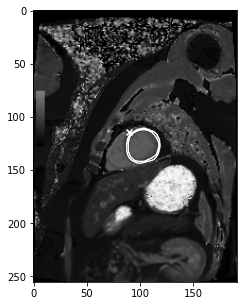

In [5]:
v = SAX_T1_View()
case1, case2 = cases1[1], cases2[1]
case1 = v.customize_case(case1)
case2 = v.customize_case(case2)
cat1, cat2 = case1.categories[0], case2.categories[0]
nr_segments = 3
for d in range(cat1.nr_slices):
    print('Slice: ', d)
    img1,  img2  = cat1.get_img (d,0,True,False), cat2.get_img (d,0,True,False)
    anno1, anno2 = cat1.get_anno(d,0), cat2.get_anno(d,0)
    fig, axes = plt.subplots(1,3,figsize=(15,5))
    for j in range(3): axes[j].imshow(img1, cmap='gray'); axes[j].axis('off')
    anno1.plot_all_contour_outlines(axes[0])
    anno1.plot_point(axes[0], 'sacardialRefPoint')
    anno2.plot_all_contour_outlines(axes[2])
    anno1.plot_cont_comparison(axes[1], anno2, 'lv_myo')
    anno2.plot_point(axes[2], 'sacardialRefPoint')
    plt.show()
    h, w     = img1.shape
    print(h,w)
    mask     = anno1.get_angle_mask_to_middle_point_by_reference_point(h,w,None)
    myo_mask = anno1.get_cont_as_mask('lv_myo', h,w)
    print(mask.shape, myo_mask.shape)
    mask_idxs = (mask>0) & (mask<40) & (myo_mask!=0)
    partial_mask = np.zeros((h,w)); partial_mask[mask_idxs]=1
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.imshow(img1+1000*partial_mask, cmap='gray')
    anno1.plot_all_contour_outlines(ax)
    anno1.plot_point(ax, 'sacardialRefPoint')
    plt.show()